In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [69]:
# get donut data
N = 600
R_inner = 10
R_outer = 20

# distance from origin is radius + random normal
# angle theta is uniformly distribution between (0, 2pi)
R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)           # random.random 是隨機分布(“continuous uniform” distribution)，不是常態分佈
X_inner = np.concatenate(([R1*np.cos(theta)], [R1*np.sin(theta)]), axis=0).T   # 寫法一  shape = (300, 2)

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.c_[R2*np.cos(theta), R2*np.sin(theta)]      # 寫法二  shape = (300, 2)

X = np.concatenate((X_inner, X_outer), axis=0)
Y = np.array([0]*(N//2)  + [1]*(N//2))


print('X.shape:',X.shape)
print('Y.shape:',Y.shape)
 

X.shape: (600, 2)
Y.shape: (600,)


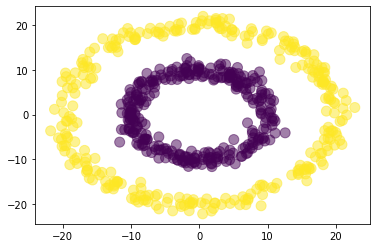

In [92]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

# 有劇烈的密度分布變化，有機會從線性不可分，轉為線性可分
# 這裡是unspervised ，不使用label做訓練，所以是依照preserve distance在資料間做關聯

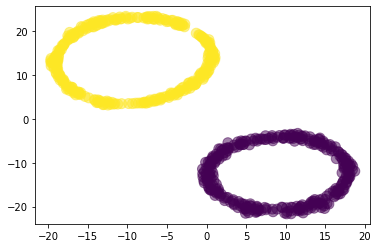

In [91]:
tsne = TSNE(perplexity=40)       
Z = tsne.fit_transform(X)
plt.scatter(Z[:, 0], Z[:, 1], c=Y, s=100, alpha=0.5)
plt.show()



# perplexity=40 給的參數不適合的話， 也不會是線性可分的結果
# The perplexity is related to the number of nearest neighbors 
# that is used in other manifold learning algorithms. 
# Larger datasets usually require a larger perplexity